In [2]:
# Pseudo-Bulk Dataset Analysis

import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
# Load pseudo-bulk aligned dataset
data = pl.read_parquet("pseudo_bulk/gdsc_single_cell_aligned.parquet")

# Select metadata columns
meta_cols = ["SANGER_MODEL_ID", "DRUG_ID", "LN_IC50"]

# Basic stats
num_cell_lines = data.select("SANGER_MODEL_ID").n_unique()
num_drugs = data.select("DRUG_ID").n_unique()
num_pairs = data.shape[0]
num_genes = data.shape[1] - len(meta_cols)

print(f"Unique Cell Lines: {num_cell_lines}")
print(f"Unique Drugs: {num_drugs}")
print(f"Total (Cell Line, Drug) Pairs: {num_pairs}")
print(f"Number of Genes: {num_genes}")

Unique Cell Lines: 978
Unique Drugs: 621
Total (Cell Line, Drug) Pairs: 575197
Number of Genes: 2000


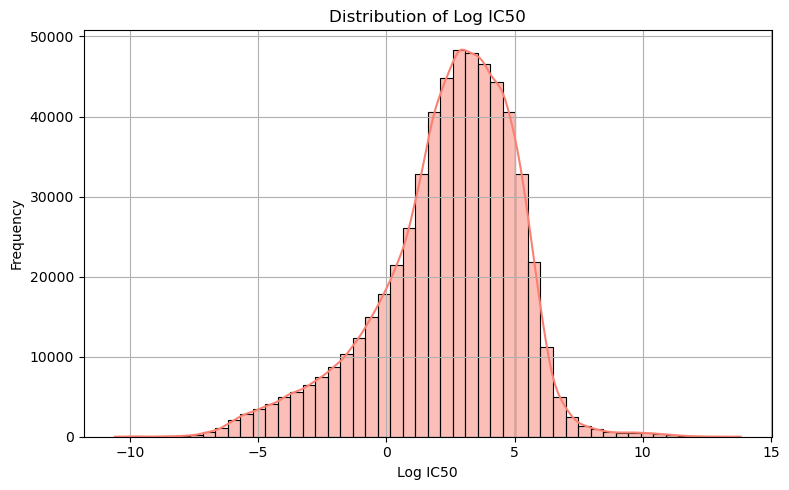

In [4]:
# Convert IC50 column to pandas for plotting
ic50 = data.select("LN_IC50").to_pandas()

plt.figure(figsize=(8, 5))
sns.histplot(ic50["LN_IC50"], bins=50, kde=True, color="salmon")
plt.title("Distribution of Log IC50")
plt.xlabel("Log IC50")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
# Extract gene expression matrix
gene_cols = [col for col in data.columns if col not in meta_cols]
gene_data = data.select(gene_cols).to_pandas()

# Fit PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(gene_data)

# Plot PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA of Gene Expression")
plt.grid(True)
plt.tight_layout()
plt.show()


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values